# Performance Analysis of OpenMP with Cantera

---

>"**report_time.csv**" file contains the execution time for different values of *Threads* and *Package sizes*.

In [1]:
import pandas as pd

df = pd.read_csv("report_time_bad_allocation.csv")
df["total_time[s]"] = df["read_time[s]"] + df["calc_time[s]"] + df["write_time[s]"]
df

,threads,package,points,read_time[s],calc_time[s],write_time[s],total_time[s]
0,1,5,55076,0.650213,567.173,0.947307,568.770520
1,1,10,55076,0.652268,573.815,0.940192,575.407460
2,1,15,55076,0.645684,582.736,0.942887,584.324571
3,1,20,55076,0.645230,596.990,0.958328,598.593558
4,1,25,55076,0.641649,605.157,0.942448,606.741097
...,...,...,...,...,...,...,...
115,32,80,55076,0.650305,230.113,0.988346,231.751651
116,32,85,55076,0.664472,230.885,0.998037,232.547509
117,32,90,55076,0.662563,234.415,1.000840,236.078403
118,32,95,55076,0.647466,244.831,1.003280,246.481746


---

>Next processing generate a *mesh grid*. The goal is visualize execution time for different *threads* and *package sizes* at the same time.

In [2]:
import numpy as np

threads=np.array([1,2,4,8,16,32])
packages=np.array(range(5,105,5))

m = threads.size
n = packages.size

time_mat = np.zeros([m,n])


for i in range(m):
    t = threads[i]
    for j in range(n):
        pack = packages[j]
        time_mat[i,j] = df[(df["threads"]==t) & (df["package"]==pack)].iloc[0,6]

x, y = np.meshgrid(packages,threads)

print(time_mat)

[[568.77052  575.40746  584.324571 598.593558 606.741097 614.929104
  618.192367 624.322375 627.157755 634.014847 634.290078 642.312395
  652.557015 649.398226 651.614625 655.393325 659.93352  663.991949
  661.976491 663.417259]
 [319.543383 331.173301 342.124296 345.329262 347.679782 353.303913
  355.016763 356.500867 356.483525 361.341244 360.632303 363.62497
  366.287661 367.974752 369.873465 370.518559 369.993873 369.878577
  379.007342 407.707895]
 [212.932238 224.176426 227.895163 233.527486 232.497299 228.582793
  228.404024 219.525096 222.783153 229.994329 228.912014 240.57789
  242.539021 240.529324 240.541676 246.468761 247.374217 244.557237
  242.403172 248.303727]
 [130.938892 153.401317 154.87093  149.640109 150.372766 149.940019
  148.040179 147.465718 146.10099  148.226749 145.785825 152.564789
  152.836121 152.587435 151.203227 152.43886  152.674296 152.158241
  150.845463 148.86215 ]
 [118.849225 138.397628 146.526309 146.249466 154.884309 158.997576
  165.815941 161.6

---

## Heat map visualization

>Results indicate that *package* size has no influence in performance. In addition, best performance is obtained with 16 threads instead of 32 (16 real processors and 32 logical in the machine where the program run).

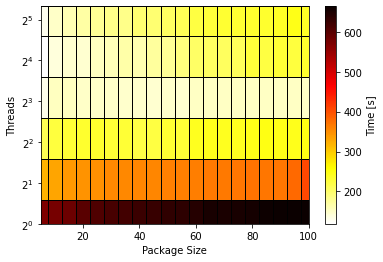

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

heat_map = ax.pcolormesh(x,y,time_mat, cmap="hot_r",edgecolors="black")

cbar = fig.colorbar(heat_map, ax=ax)
cbar.set_label("Time [s]")

#ax.set_ylim(1,32)
ax.set_ylim(1)
ax.set_xlim(5,100)
ax.set_xlabel("Package Size")
ax.set_ylabel("Threads")

ax.set_yscale("log",base=2)
#plt.yscale("log",base=2)

plt.show()

---

## Package size influence for 16 threads

>With this line chart we can confirm that, in the way this code is written, package size has no effect in performance

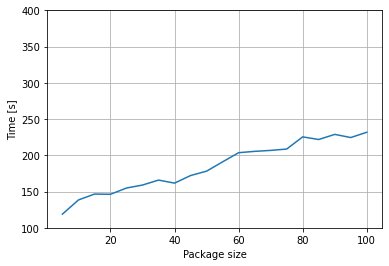

In [4]:
sixteen = df[df["threads"]==16]

fig, ax = plt.subplots()

ax.plot(sixteen["package"], sixteen["total_time[s]"])

ax.set_ylim(100,400)
ax.set_xlabel("Package size")
ax.set_ylabel("Time [s]")
ax.grid()

plt.show()

---

## Best execution time

>Analysis of the best performance execution

In [5]:
best_conf = df[df["total_time[s]"] == df["total_time[s]"].min()]
best_conf

,threads,package,points,read_time[s],calc_time[s],write_time[s],total_time[s]
80,16,5,55076,0.650519,117.247,0.951706,118.849225


In [6]:
worse_conf = df[df["total_time[s]"] == df["total_time[s]"].max()]
worse_conf

,threads,package,points,read_time[s],calc_time[s],write_time[s],total_time[s]
17,1,90,55076,0.702127,662.295,0.994822,663.991949


[0.1057433  0.54734812]


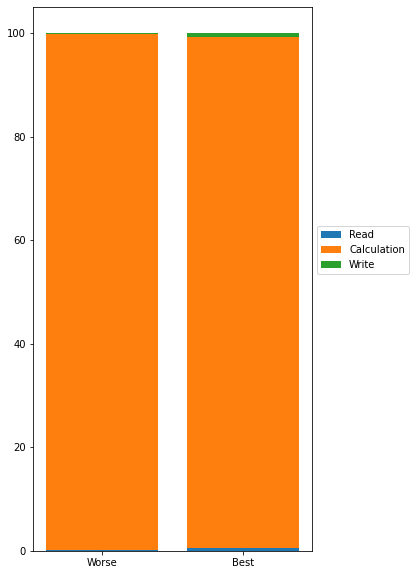

In [7]:
b_tot = best_conf["total_time[s]"].iloc[0]
b_read = best_conf["read_time[s]"].iloc[0]
b_calc = best_conf["calc_time[s]"].iloc[0]
b_write = best_conf["write_time[s]"].iloc[0]

w_tot = worse_conf["total_time[s]"].iloc[0]
w_read = worse_conf["read_time[s]"].iloc[0]
w_calc = worse_conf["calc_time[s]"].iloc[0]
w_write = worse_conf["write_time[s]"].iloc[0]

x = ["Worse", "Best"]

read_per = np.array([w_read/w_tot*100, b_read/b_tot*100])
calc_per = np.array([w_calc/w_tot*100, b_calc/b_tot*100])
write_per = np.array([w_write/w_tot*100, b_write/b_tot*100])
print(read_per)

fig, ax = plt.subplots()

fig.set_size_inches(5,10)

ax.bar(x, read_per, label="Read")
ax.bar(x, calc_per, bottom=read_per, label="Calculation")
ax.bar(x, write_per, bottom=read_per+calc_per, label="Write")
ax.legend(loc="lower left",bbox_to_anchor=(1.0,0.5))

plt.show()

>Due to read and write executions are secuential, results times in both executions (*best* and *worse*) are similar (but relatively, *best*'s read and write times are greater than *worse*). Even so, both can be ignored comparing with calculation time.

---

## Speed up

> Results are worse than expected, the code has to be improved in order to gain better performance. Mesh points have no dependency on each other, so the parallelization should be almost ideal.

In [8]:
serial_time = df[(df["threads"]==1) & (df["package"]==5)].iloc[0,6]
print("Serial Time: ", serial_time, "s")

df["speedup"] = serial_time / df["total_time[s]"]
df

Serial Time:  568.77052 s


,threads,package,points,read_time[s],calc_time[s],write_time[s],total_time[s],speedup
0,1,5,55076,0.650213,567.173,0.947307,568.770520,1.000000
1,1,10,55076,0.652268,573.815,0.940192,575.407460,0.988466
2,1,15,55076,0.645684,582.736,0.942887,584.324571,0.973381
3,1,20,55076,0.645230,596.990,0.958328,598.593558,0.950178
4,1,25,55076,0.641649,605.157,0.942448,606.741097,0.937419
...,...,...,...,...,...,...,...,...
115,32,80,55076,0.650305,230.113,0.988346,231.751651,2.454224
116,32,85,55076,0.664472,230.885,0.998037,232.547509,2.445825
117,32,90,55076,0.662563,234.415,1.000840,236.078403,2.409244
118,32,95,55076,0.647466,244.831,1.003280,246.481746,2.307556


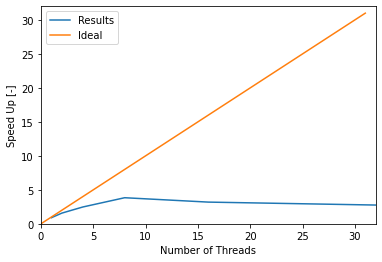

In [9]:
speedup_data = df[df["package"] == 50] # Package value does not matter

fig, ax = plt.subplots()

ax.plot(speedup_data["threads"], speedup_data["speedup"])

# Ideal parallelization
ax.plot(range(0,32), range(0,32))

ax.set_xlim(0,32)
ax.set_ylim(0,32)
ax.set_xlabel("Number of Threads")
ax.set_ylabel("Speed Up [-]")
ax.legend(["Results", "Ideal"])

plt.show()

---

## The C++ code where this results come is:  
  


```C++
    /******************** CALCULATION **********************/

    /* Outer loop to deliver work to threads */
    #pragma omp parallel for schedule(dynamic)
    for (size_t i = 0; i < ext_it; i++){
        size_t thread_points;
        // Limit the pack_size to the last iteration
        // because the number of points to process is the remainder
        if (i == (ext_it - 1) && mod > 0)
            thread_points = mod;
        else
            thread_points = pack_size;

        /********* VECTORS ***********/
        // Allocation of the required memory for Cantera application

        // Vector of pointers for solutions, ThermoPhases and reactors
        std::vector<std::shared_ptr<Cantera::Solution>> solutions;
        std::vector<std::shared_ptr<Cantera::ThermoPhase>> gases;

        for (size_t j = 0; j < thread_points; j++){
            solutions.push_back(Cantera::newSolution(mechanism,phase,"None"));
            gases.push_back(solutions[j]->thermo());
        }

        std::vector<Cantera::IdealGasConstPressureReactor> reactors(thread_points);
        std::vector<Cantera::ReactorNet> nets(thread_points);
        /****************************/
        

        /* Inner loop to integrate the chemical */
        for (size_t j = 0; j < thread_points; j++){
            // Index of the global point
            size_t index = i * pack_size + j;

            // Define initial Values of unknows (Corresponds to phi = 1.0, perfect fuel air mixture)
            gases[j]->setState_TPY(mesh->temp[index], p, mesh->matSp[index].data());


            // Insert the reaction
            reactors[j].insert(solutions[j]);
            nets[j].addReactor(reactors[j]);

            // Integrate time step
            nets[j].advance(dt);    

            // Save solution
            mesh->temp[index] = reactors[j].temperature();
            gases[j]->getMassFractions(mesh->matSp[index].data());
            mesh->enthal[index] = gases[j]->enthalpy_mass();
        }
    }
    /************************************************************/
```